In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve



In [2]:
#Importing Leads Dataset
leads = pd.read_csv(r"C:\Users\mohit.parashar\Desktop\MP Python\Machine Learning\Lead Case Study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [3]:
#Explore the Dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.shape

(9240, 37)

## Data Cleanup

In [7]:
# Checking for duplicates and dropping the entire duplicate row if any : 
leads.drop_duplicates(subset=None, inplace=True)

In [8]:
#Shape is same means there is no dumplicate rows presented. 
leads.shape

(9240, 37)

We observed some columns have values as "Select". This indicates that the user did not select any option and it is as equivalent as "Null".

We will find out all the columns having value as "Select" and replace them. 

In [9]:
columns=list(leads.columns)
for i in columns:
    if 'Select' in leads[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [10]:
#Replacing the Values 
leads = leads.replace('Select', np.nan)

In [11]:
#No More Select values in columns 
columns=list(leads.columns)
for i in columns:
    if 'Select' in leads[i].values:
        print(i)

In [12]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
#Check for NULL/MISSING values
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [14]:
#Since we have many columns where more than 50% of data is missing 
# but when we checked the data in detail it seems there are some columns are having 45% missing data.
# It can be mislead our analysis so Its better to remove all columns with missing data share of 40%. 
ec=leads.isnull().sum()/ len(leads)
leads.drop(labels=list(ec[ec.values>0.40].index),axis=1,inplace=True)
leads.shape


(9240, 30)

In [15]:
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [16]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [17]:
# Dropping unique valued columns
leads= leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [18]:

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [19]:
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Prospect ID                                       0.00
Search                                            0.00
Lead Numbe

In [20]:
#City still having highest null values
leads['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [21]:
#It seems City also not giving any strong data So I think we can drop this. 
leads=leads.drop(['City'],axis=1)

In [22]:
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper Article                                 0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Prospect ID                                       0.00
Search                                            0.00
Lead Number                                       0.00
Total Time

In [23]:
#Let's Explore Specialization :
leads['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

We Can not drop this column becuase this have valuable information. But We can repplace the NaN value with "N/A" or "Not Selected"

Meanwhile Let's explpore the Other 4 columns also where missing value is more than 25%.

In [24]:
leads['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [25]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [26]:
leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [27]:
leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [28]:
leads['Specialization'] = leads['Specialization'].fillna('not provided') 
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('not provided')
leads['Country'] = leads['Country'].fillna('not provided')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('not provided')
leads['Tags'] = leads['Tags'].fillna('not provided')


In [29]:
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Prospect ID                                      0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
Tags                                             0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Newspaper Article                                0.00
Search                                           0.00
Specialization                                   0.00
What is your current occupation                  0.00
Lead Number                                      0.00
Country                                          0.00
Total Time Spent on Website 

In [30]:
# As Now We have very few null value left which we can remove. It will not impact much in analysis. 
leads = leads[leads.isnull().sum(axis=1) <1]

In [31]:
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                      0.0
Converted                                     

We can remove the Prospect ID and Lead Number fields as they serve only as unique identification numbers without any practical use.

In [32]:
leads=leads.drop(['Prospect ID', 'Lead Number'], axis=1)

In [33]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

As Data looks clean now We can start EDA. 
# EDA

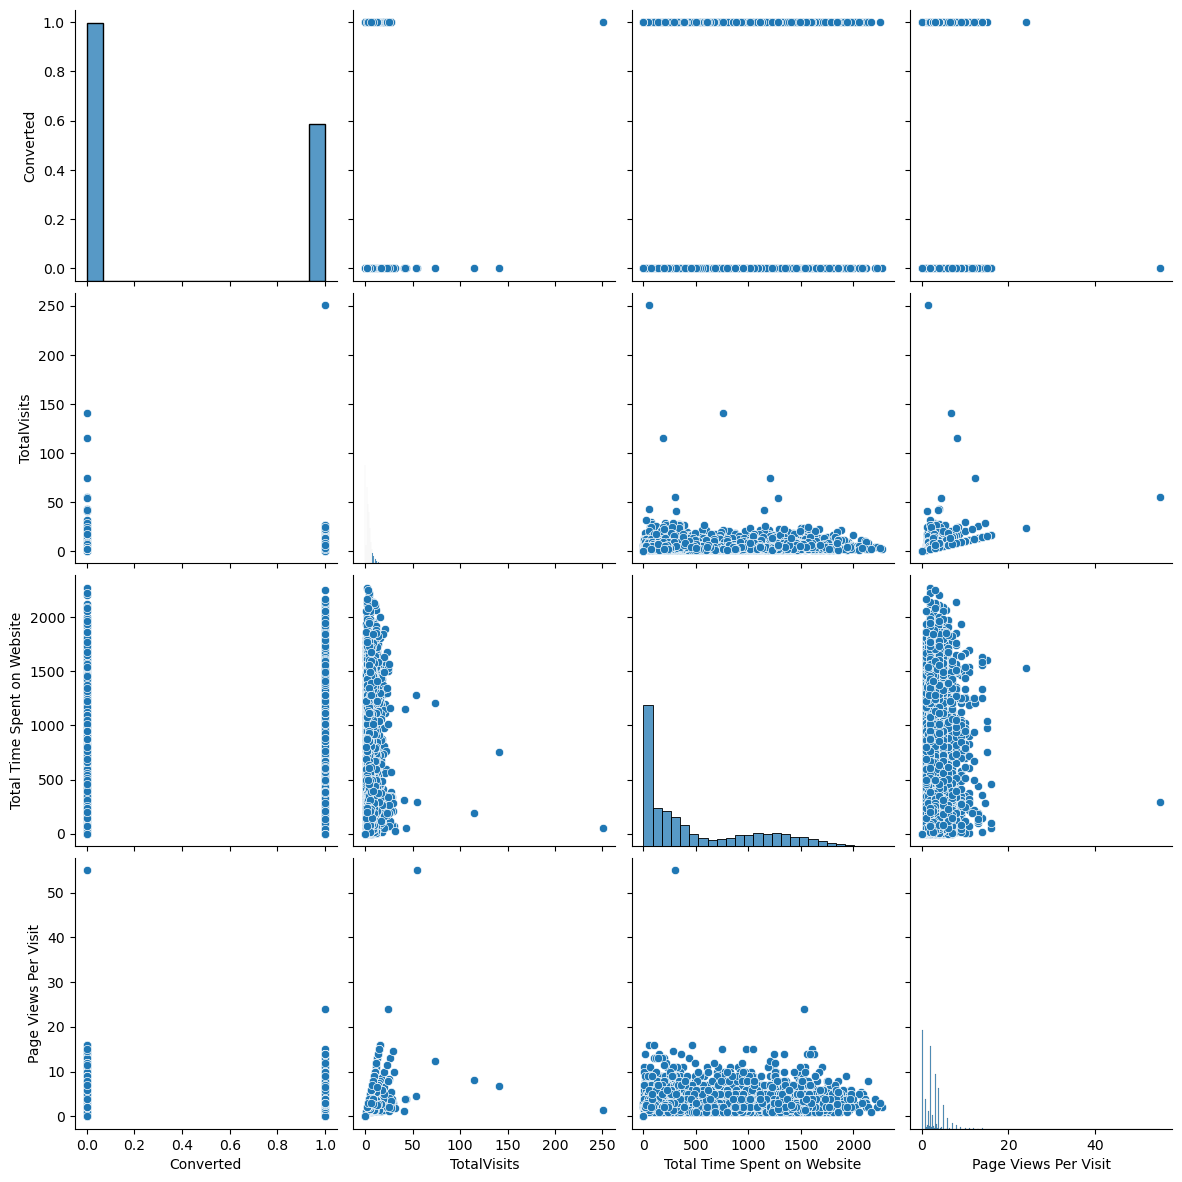

In [34]:
sns.pairplot(leads,size=3, aspect=1, kind='scatter')
plt.show()

<Axes: ylabel='proportion'>

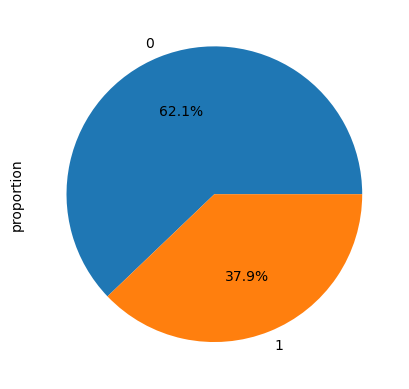

In [35]:
leads.Converted.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

### Analysing Categorical features

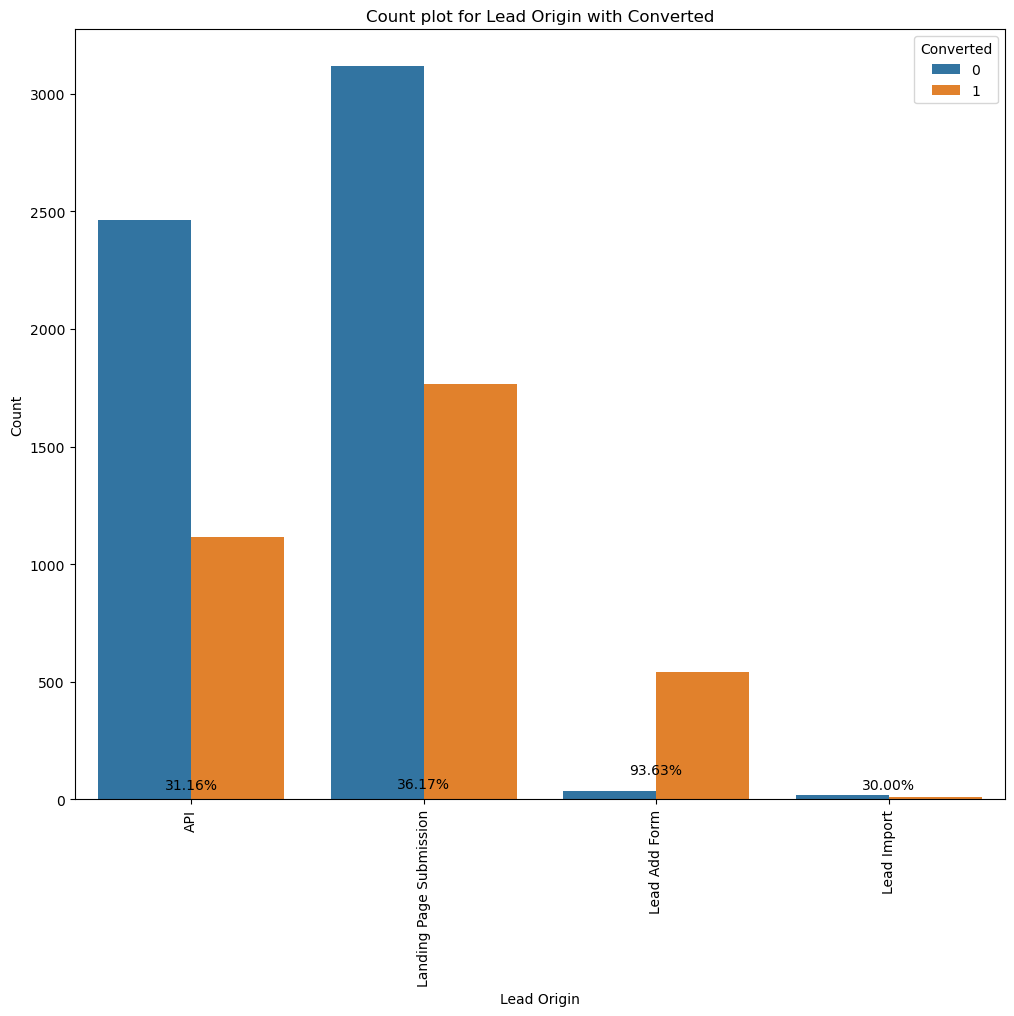

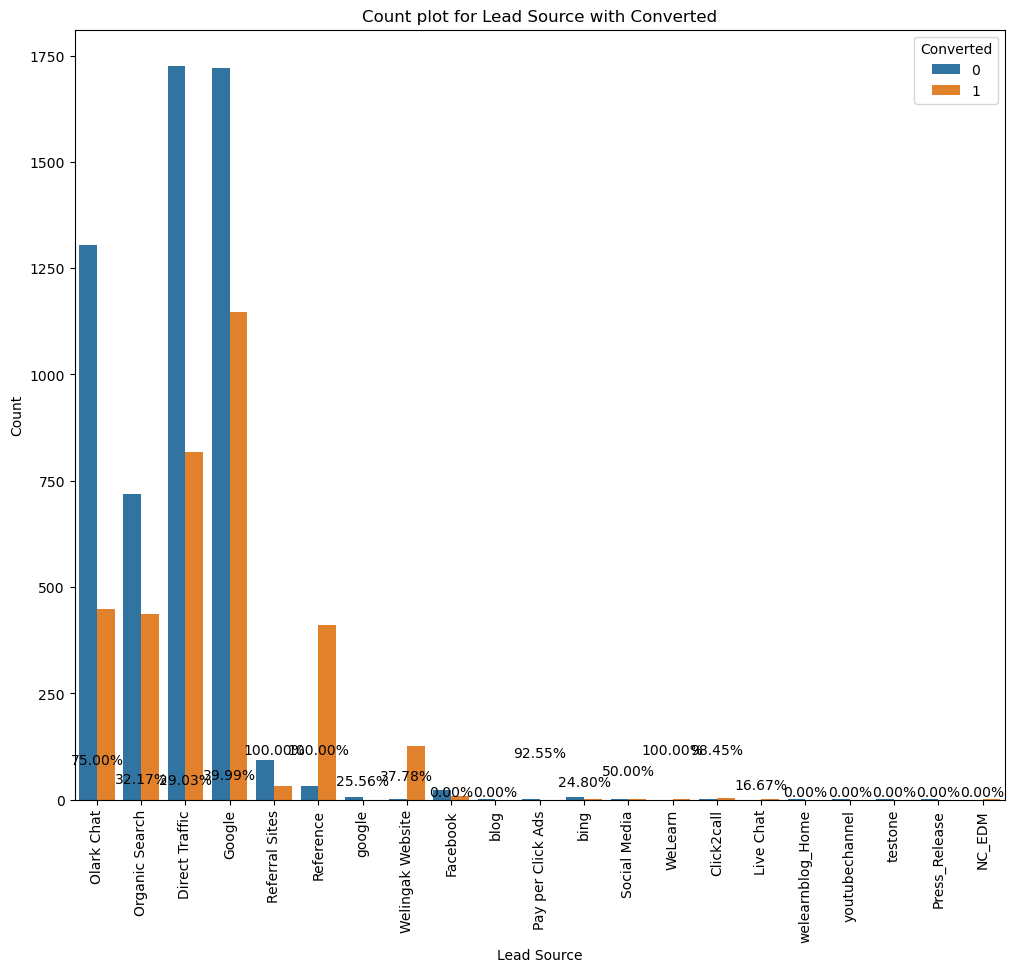

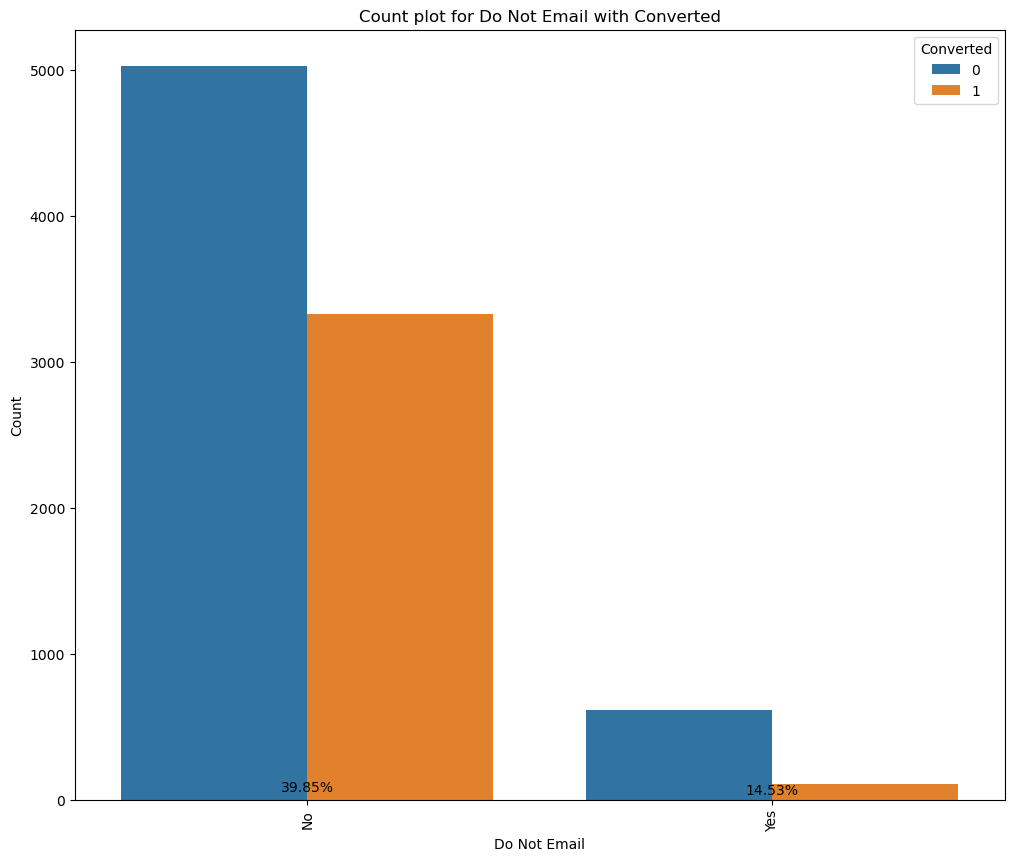

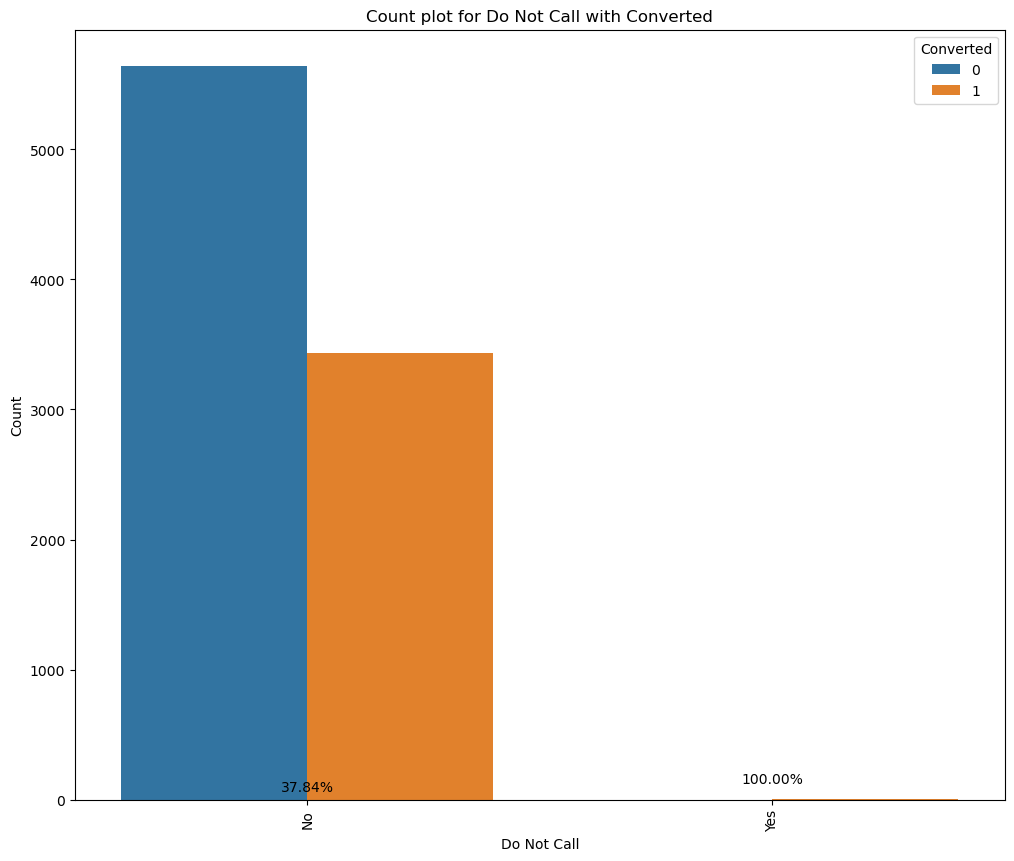

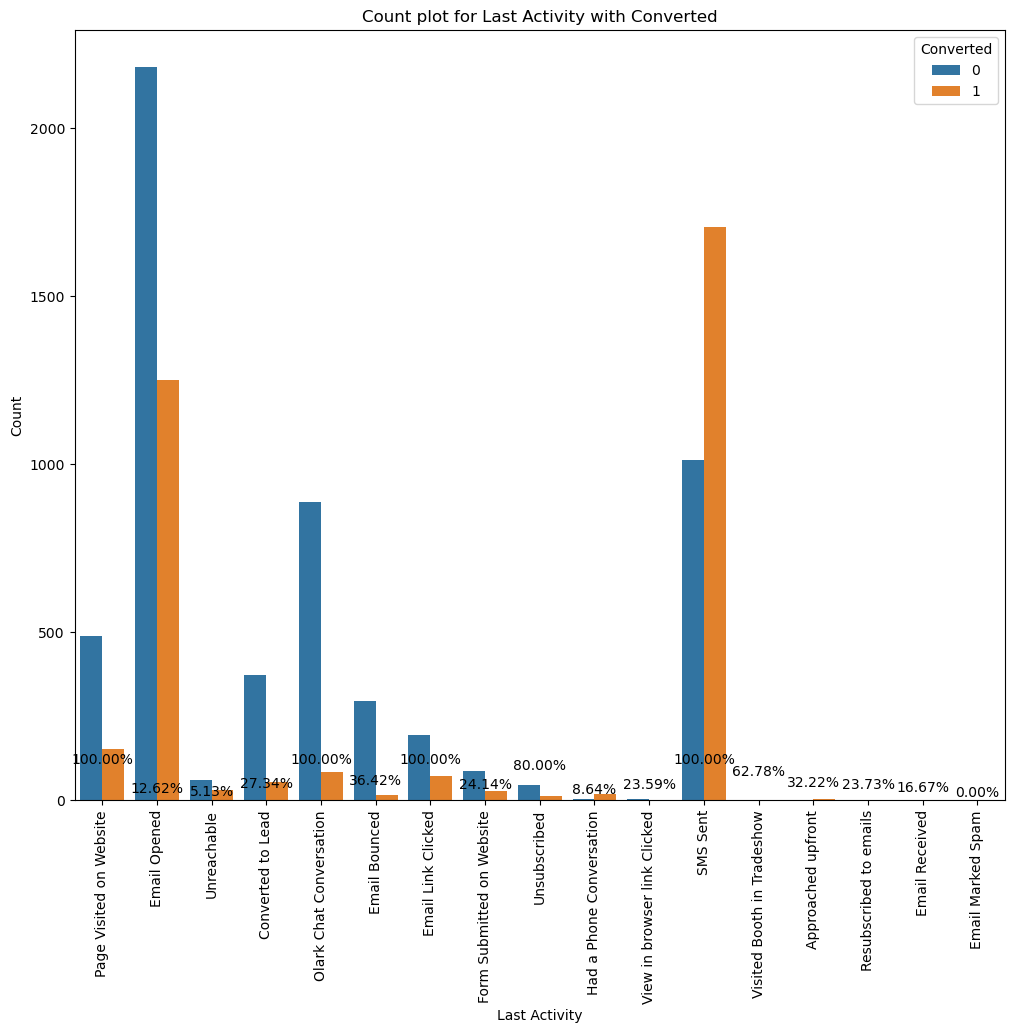

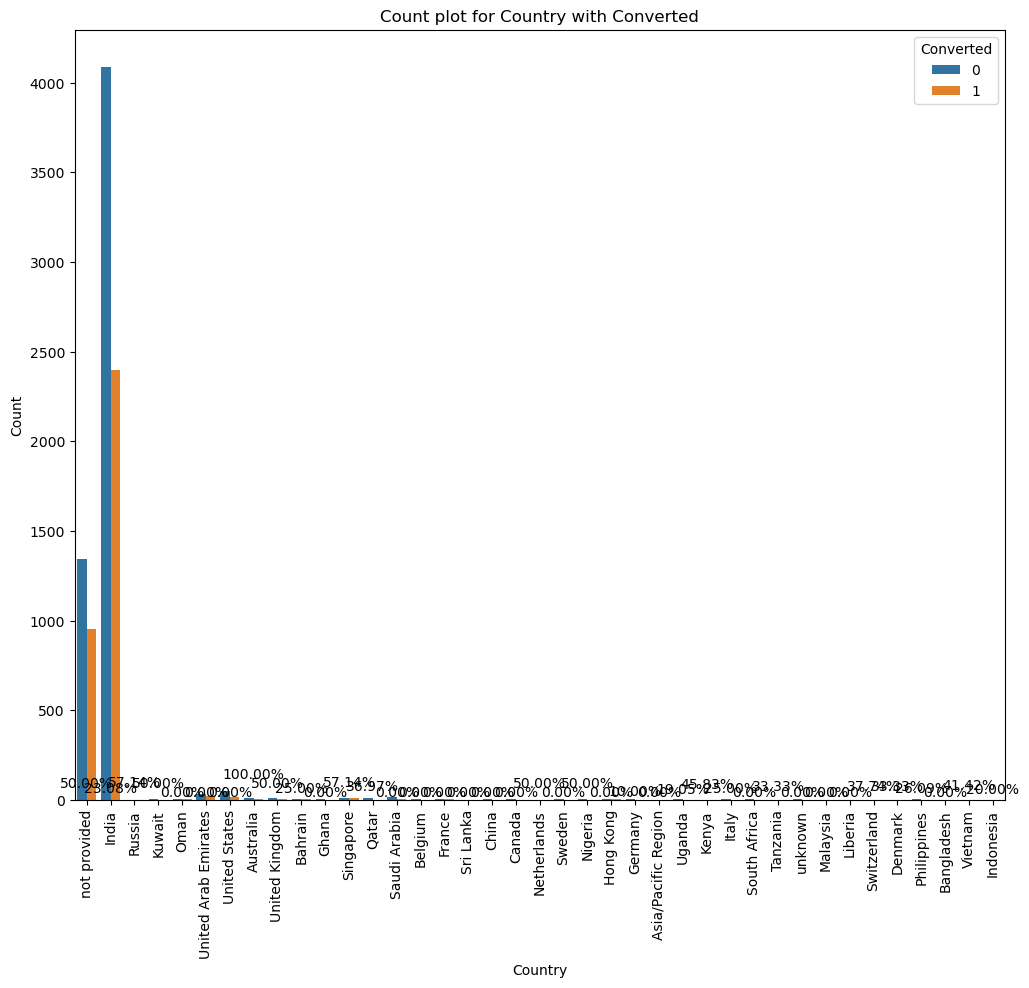

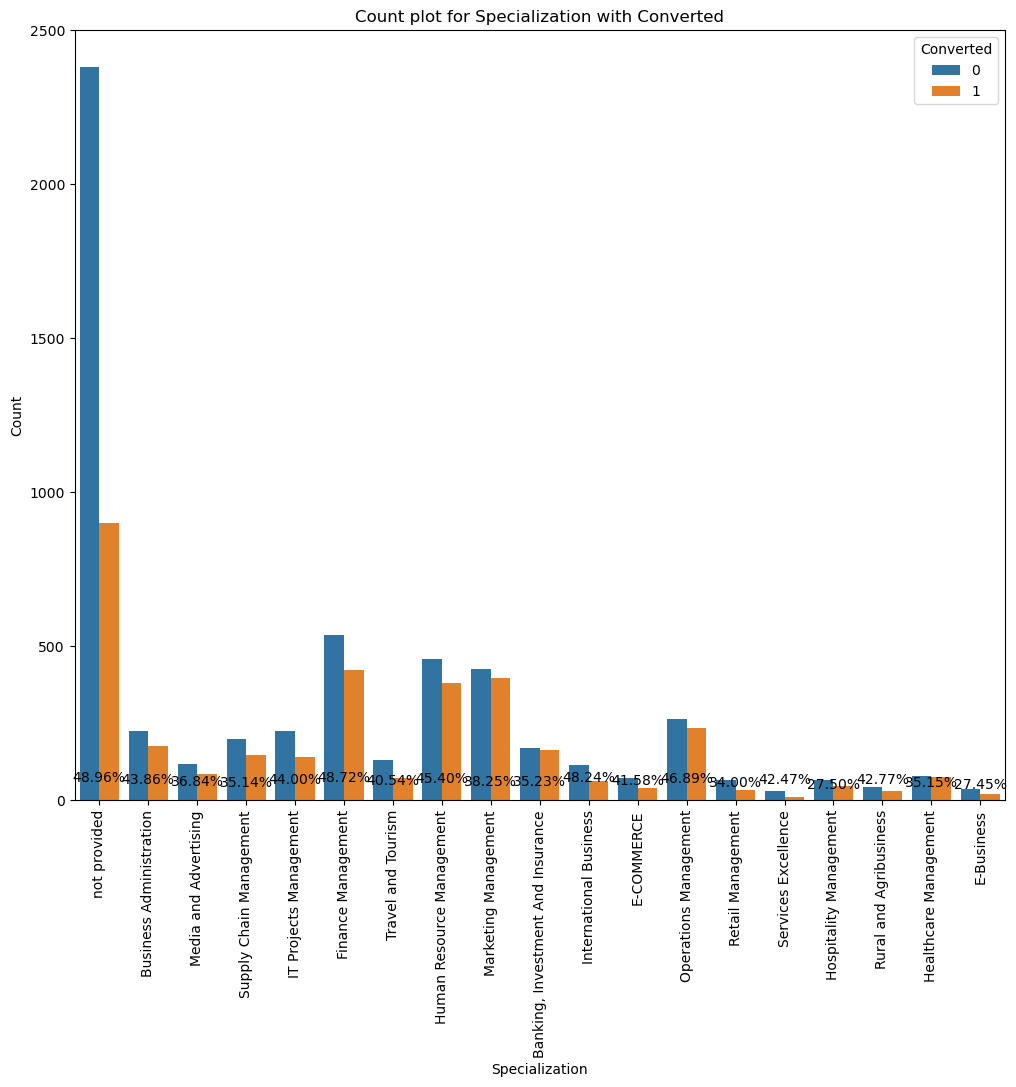

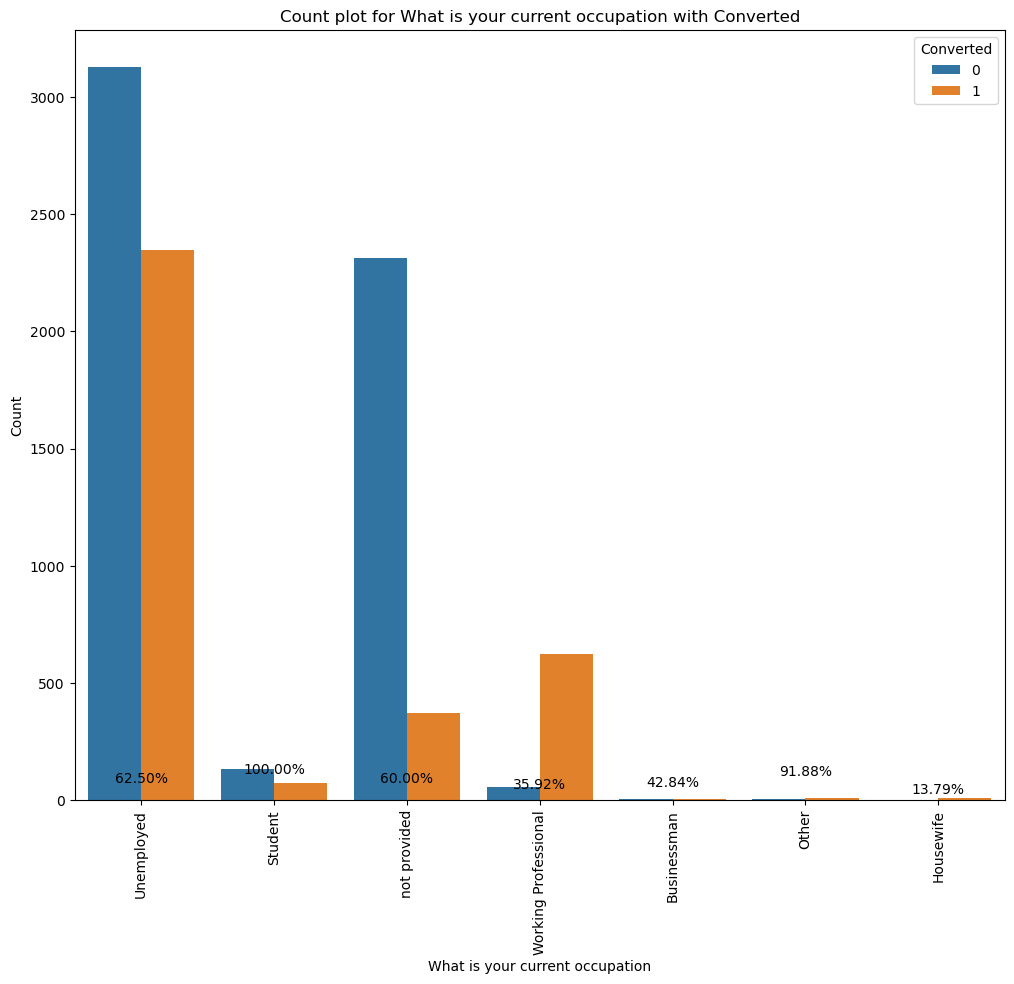

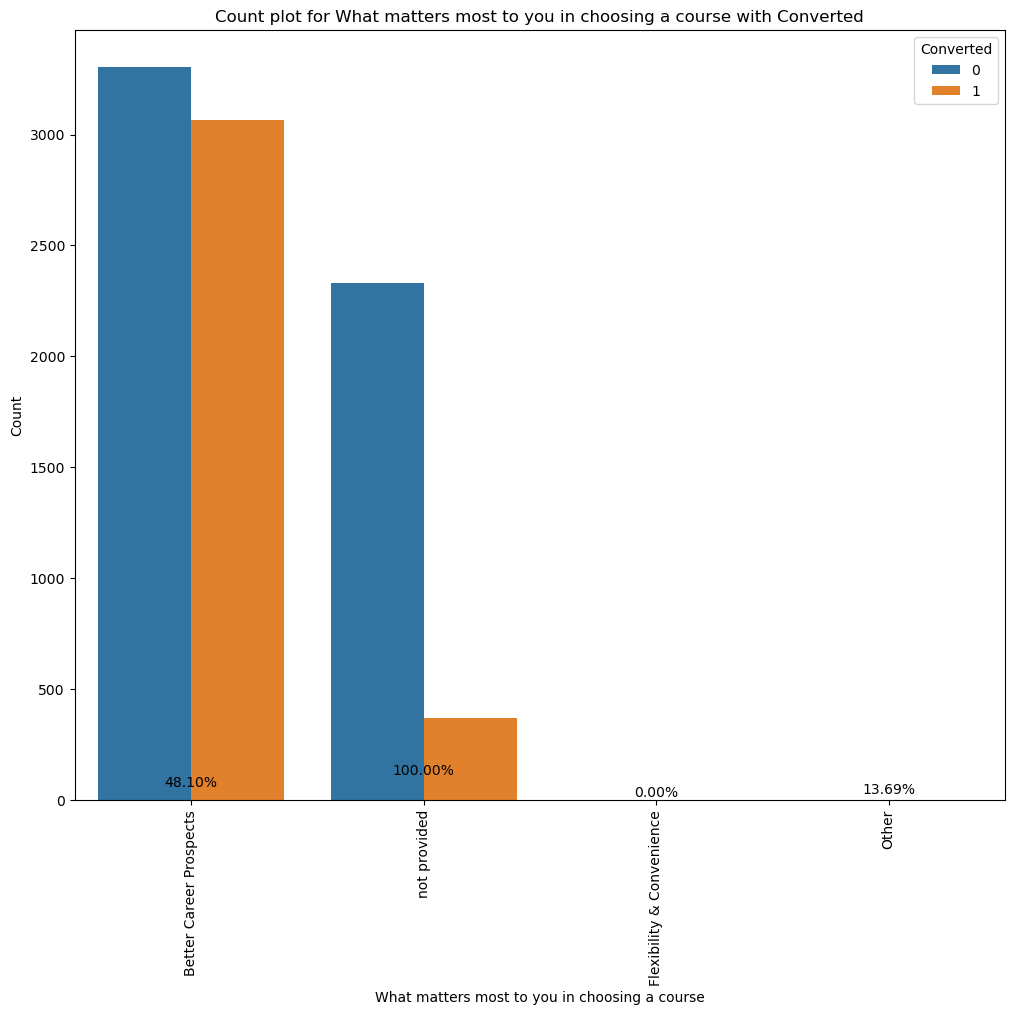

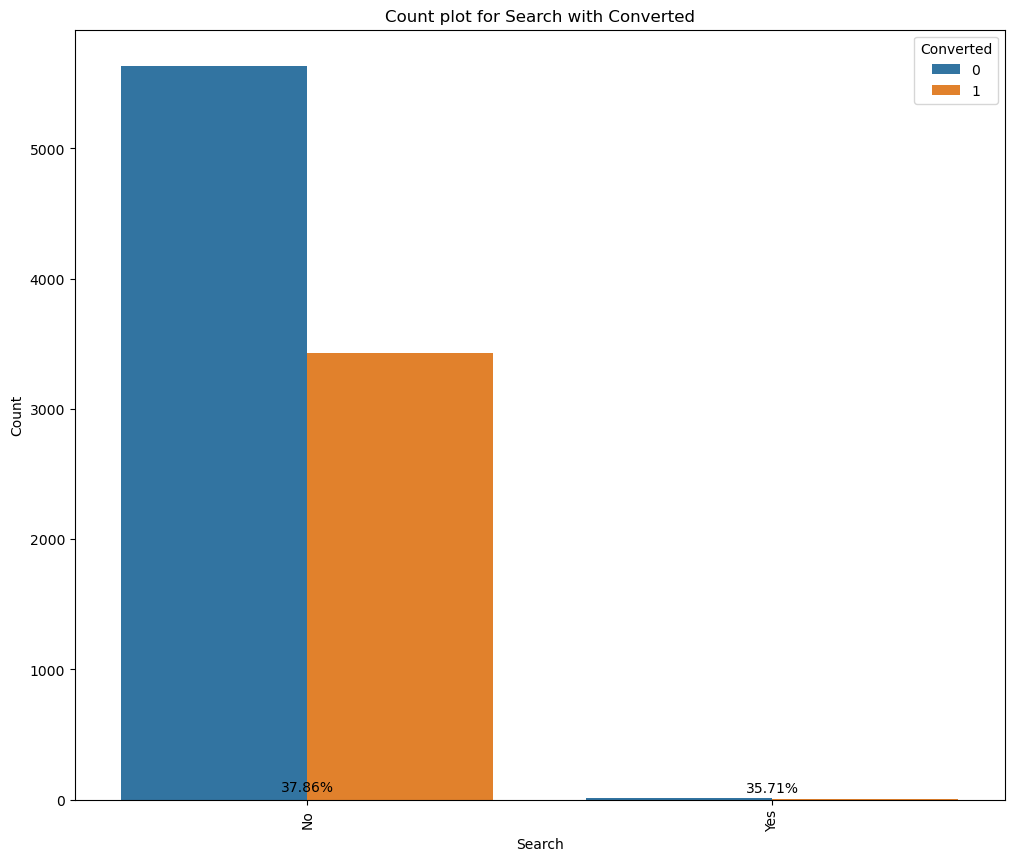

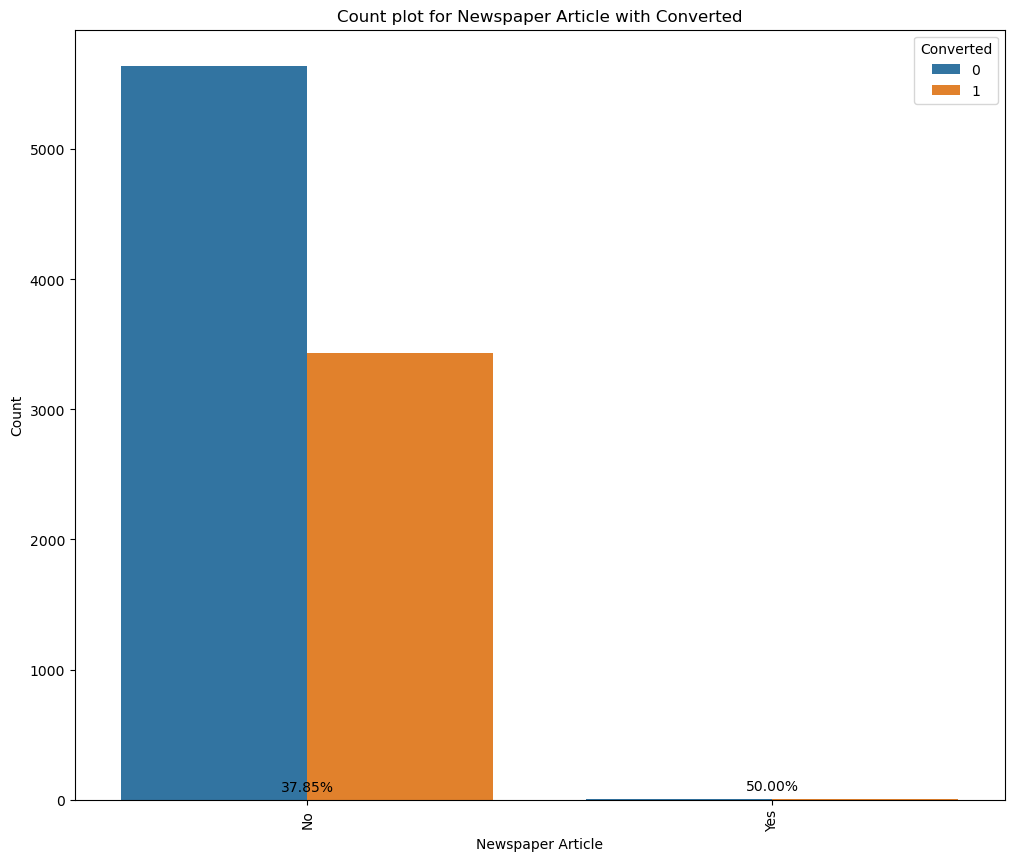

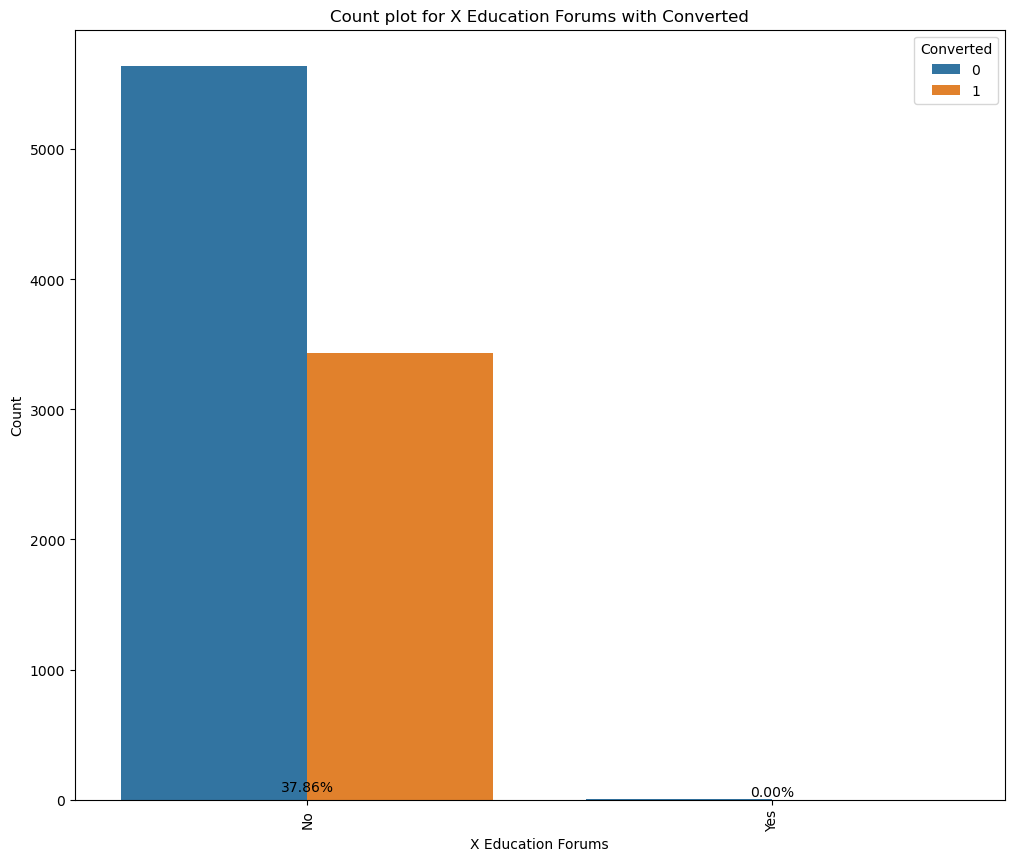

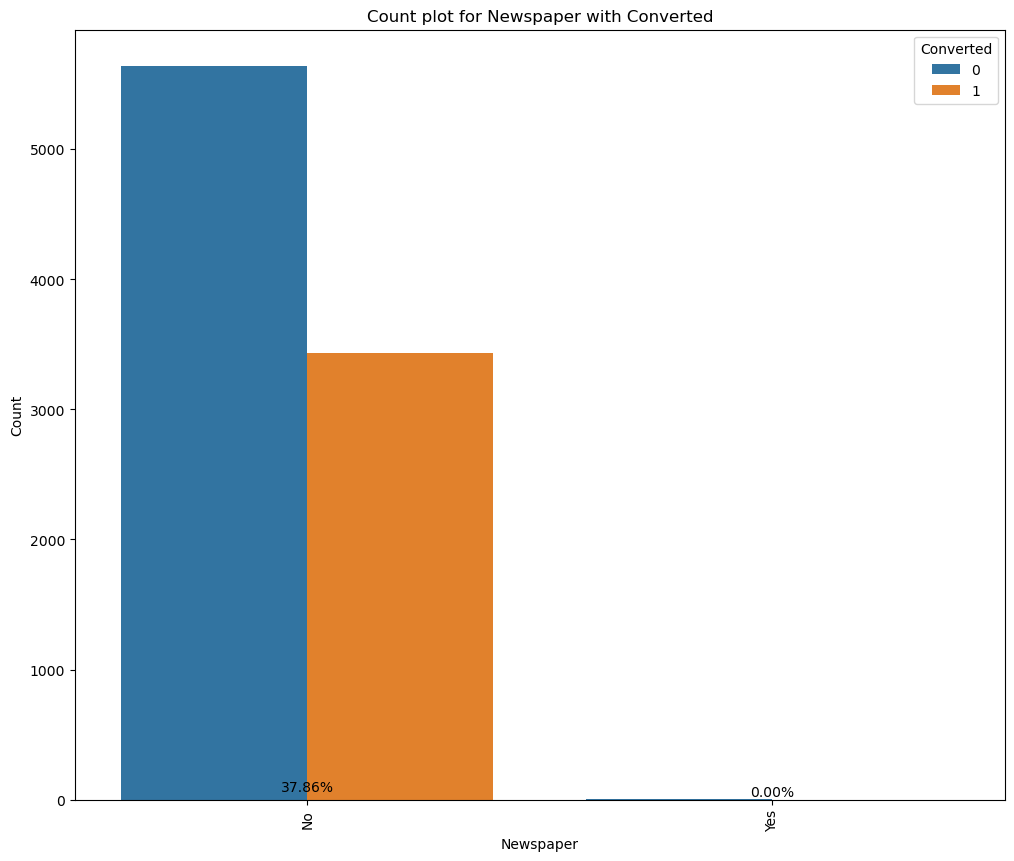

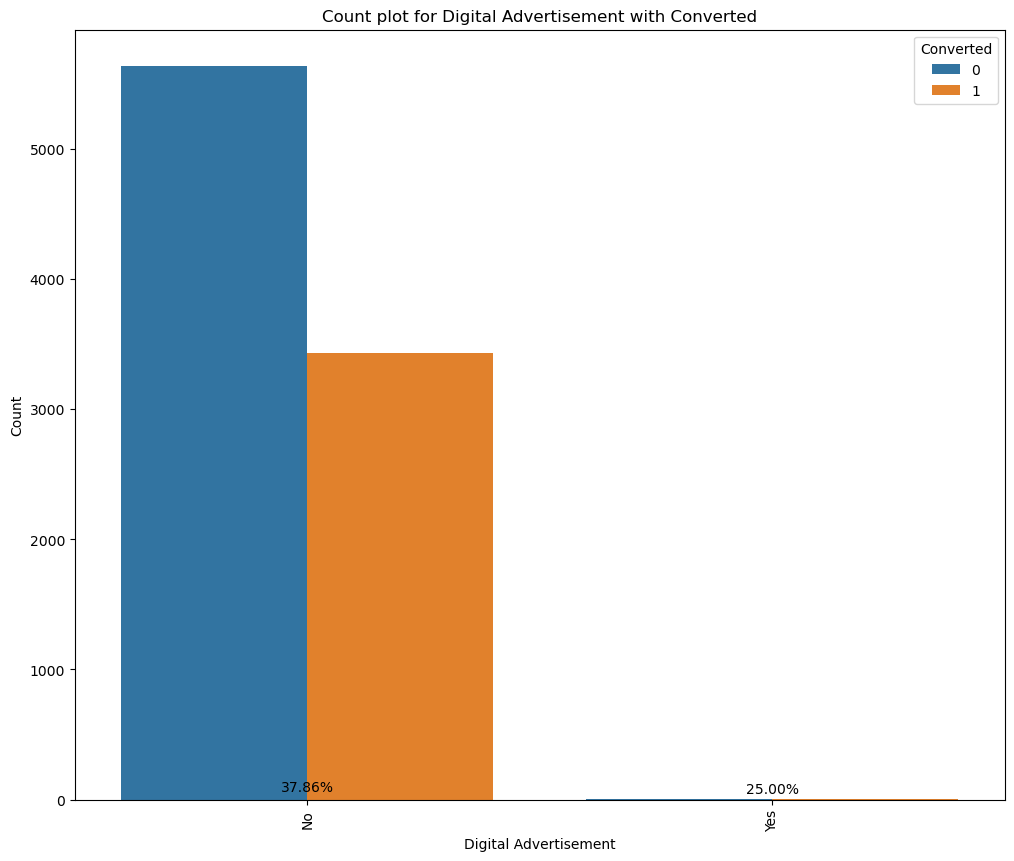

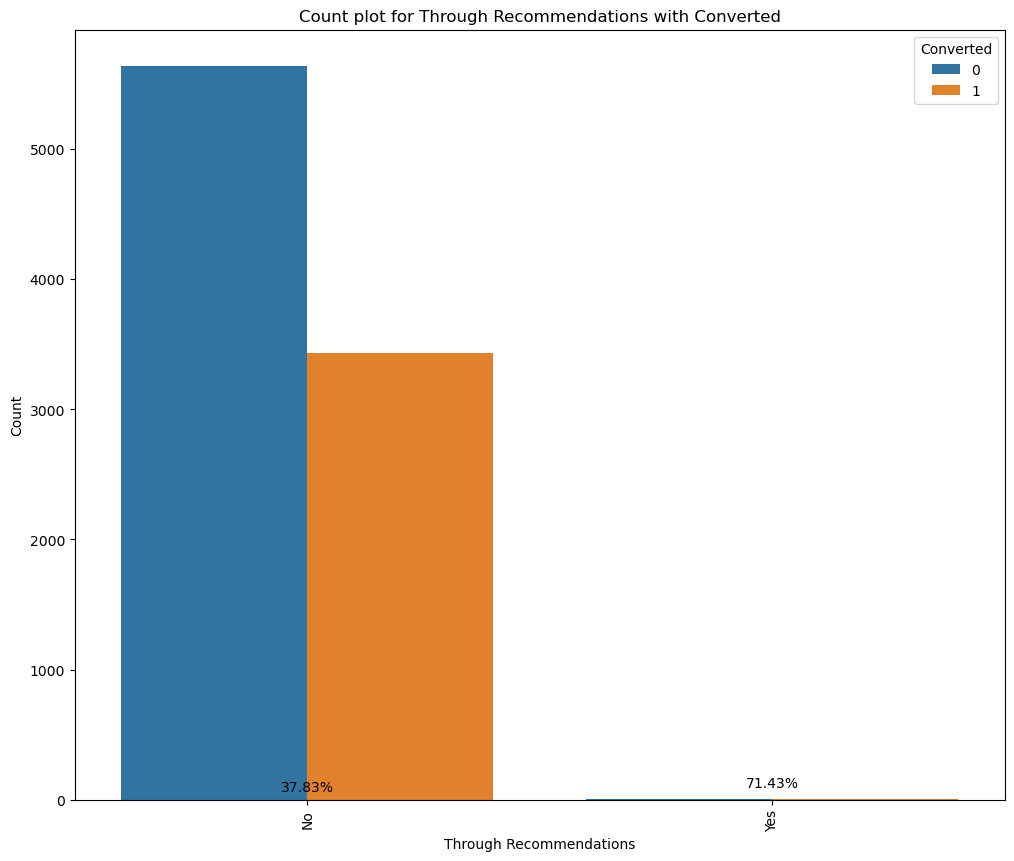

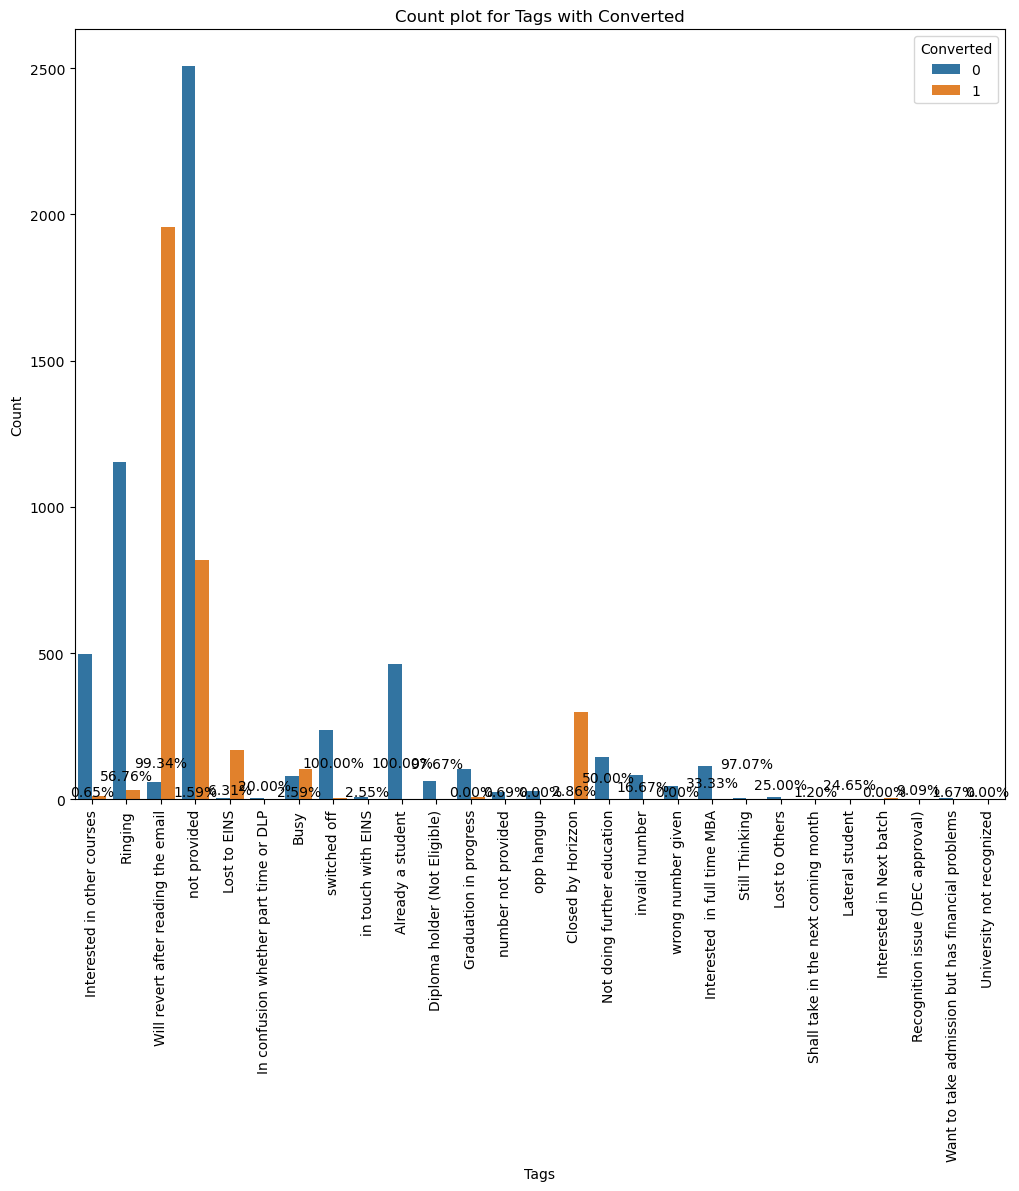

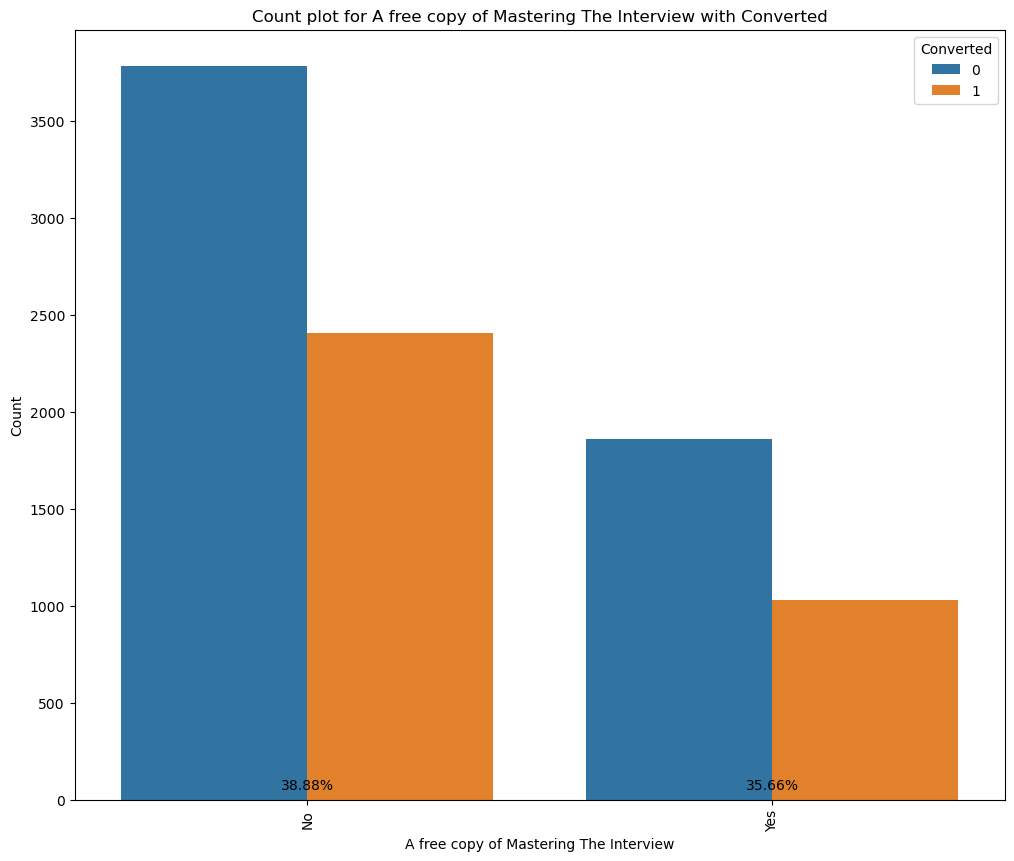

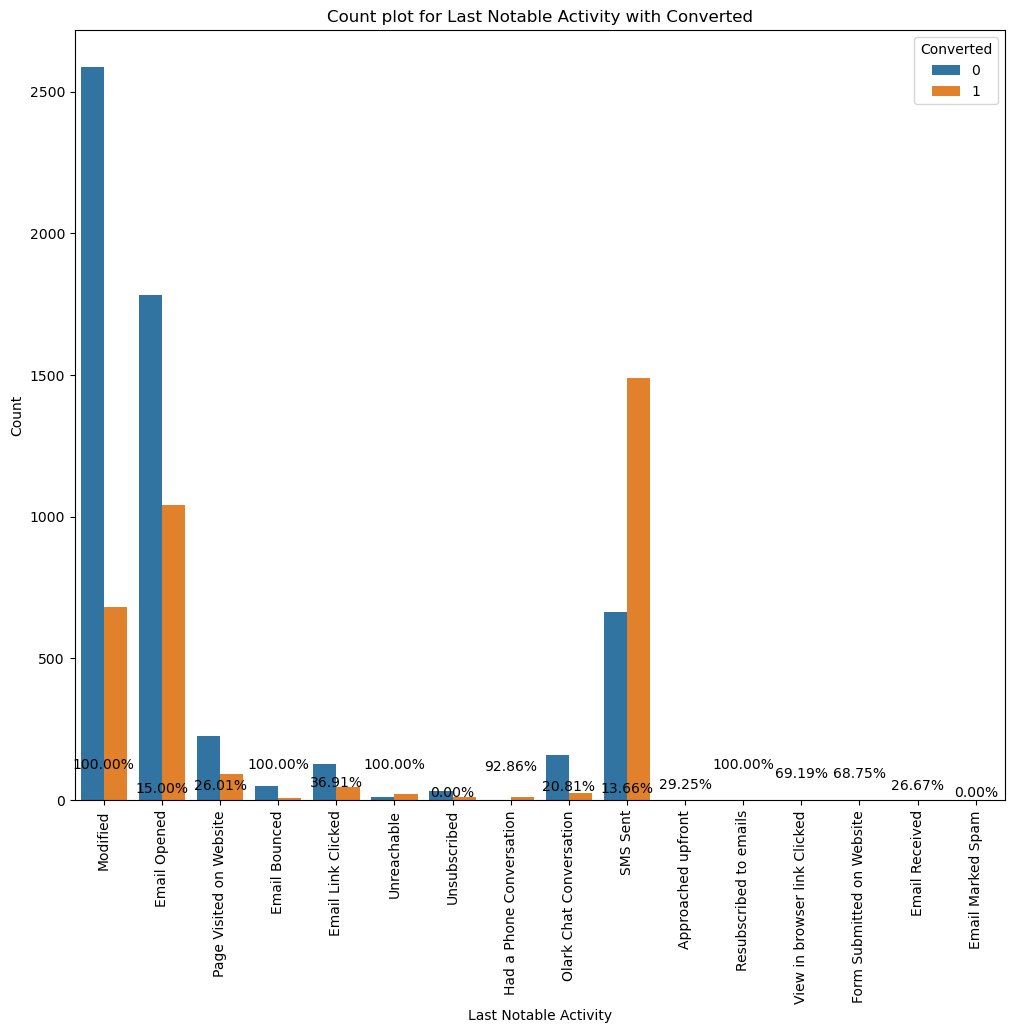

In [36]:
categorical_columns = list(leads.select_dtypes(include= 'object').columns) 
for i in categorical_columns:
    plt.figure(figsize=(12, 10))
    sns.countplot(x=i, hue='Converted', data=leads)
    plt.title(f'Count plot for {i} with Converted')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    
    # Calculate conversion rate and display as text
    conversion_rate = (leads.groupby(i)['Converted'].sum() / leads.groupby(i)['Converted'].count()) * 100
    for idx, rate in enumerate(conversion_rate):
        plt.text(idx, rate, f'{rate:.2f}%', ha='center', va='bottom')

    plt.show()

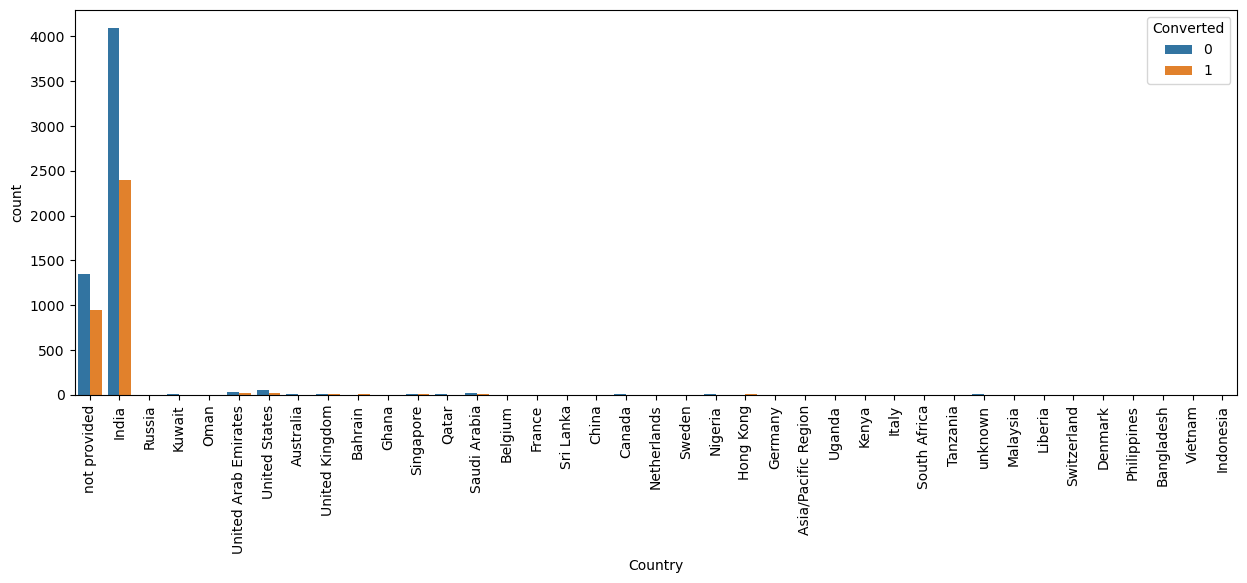

In [37]:
#visualizing the Country Sepratly
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Country', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [38]:
leads['Country']= leads['Country'].apply(lambda x: 'India' if str(x).lower() == 'india' else 'Rest of the World' if str(x).lower() != 'not provided' else 'not provided')

leads['Country'].value_counts(dropna=False)

Country
India                6491
not provided         2296
Rest of the World     287
Name: count, dtype: int64

### To check the correlation among varibles


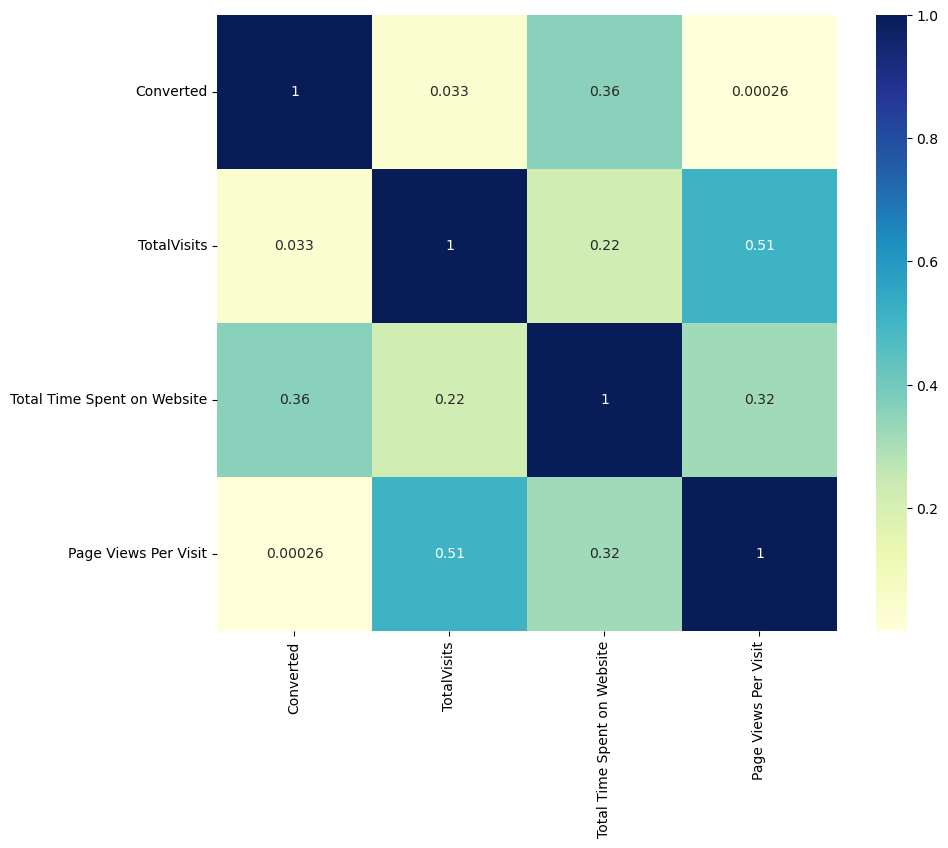

In [39]:
numeric_columns = leads.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = leads[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

### Dummy Variable Creation


In [40]:
# Checking the columns which are of type 'object'
list(leads.select_dtypes(include= 'object').columns) 

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [41]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']], drop_first=True,dtype=int)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [42]:
list(leads.columns) 

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Direct Traffic',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Live Chat',
 'Lead Source_NC_EDM',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',

In [43]:
leads.drop (['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity'],axis = 1, inplace = True)

In [44]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Test-Train Split
The next step is to spliting the dataset into training an testing sets.

In [45]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

# Putting response variable to y
y = leads['Converted']

In [46]:
X.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting the data into train and test

In [48]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [49]:
print(leads.shape, ":: Overall")         #Overall 
print(X_train.shape,":: Training Data")     #Training Data 
print(y_test.shape, ":: Test Data")      #Test Data 

(9074, 122) :: Overall
(6351, 121) :: Training Data
(2723,) :: Test Data


### Scaling 
Now, we have several numeric variables in the dataset that are on different scales. Let's proceed to standardize these variables

In [50]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


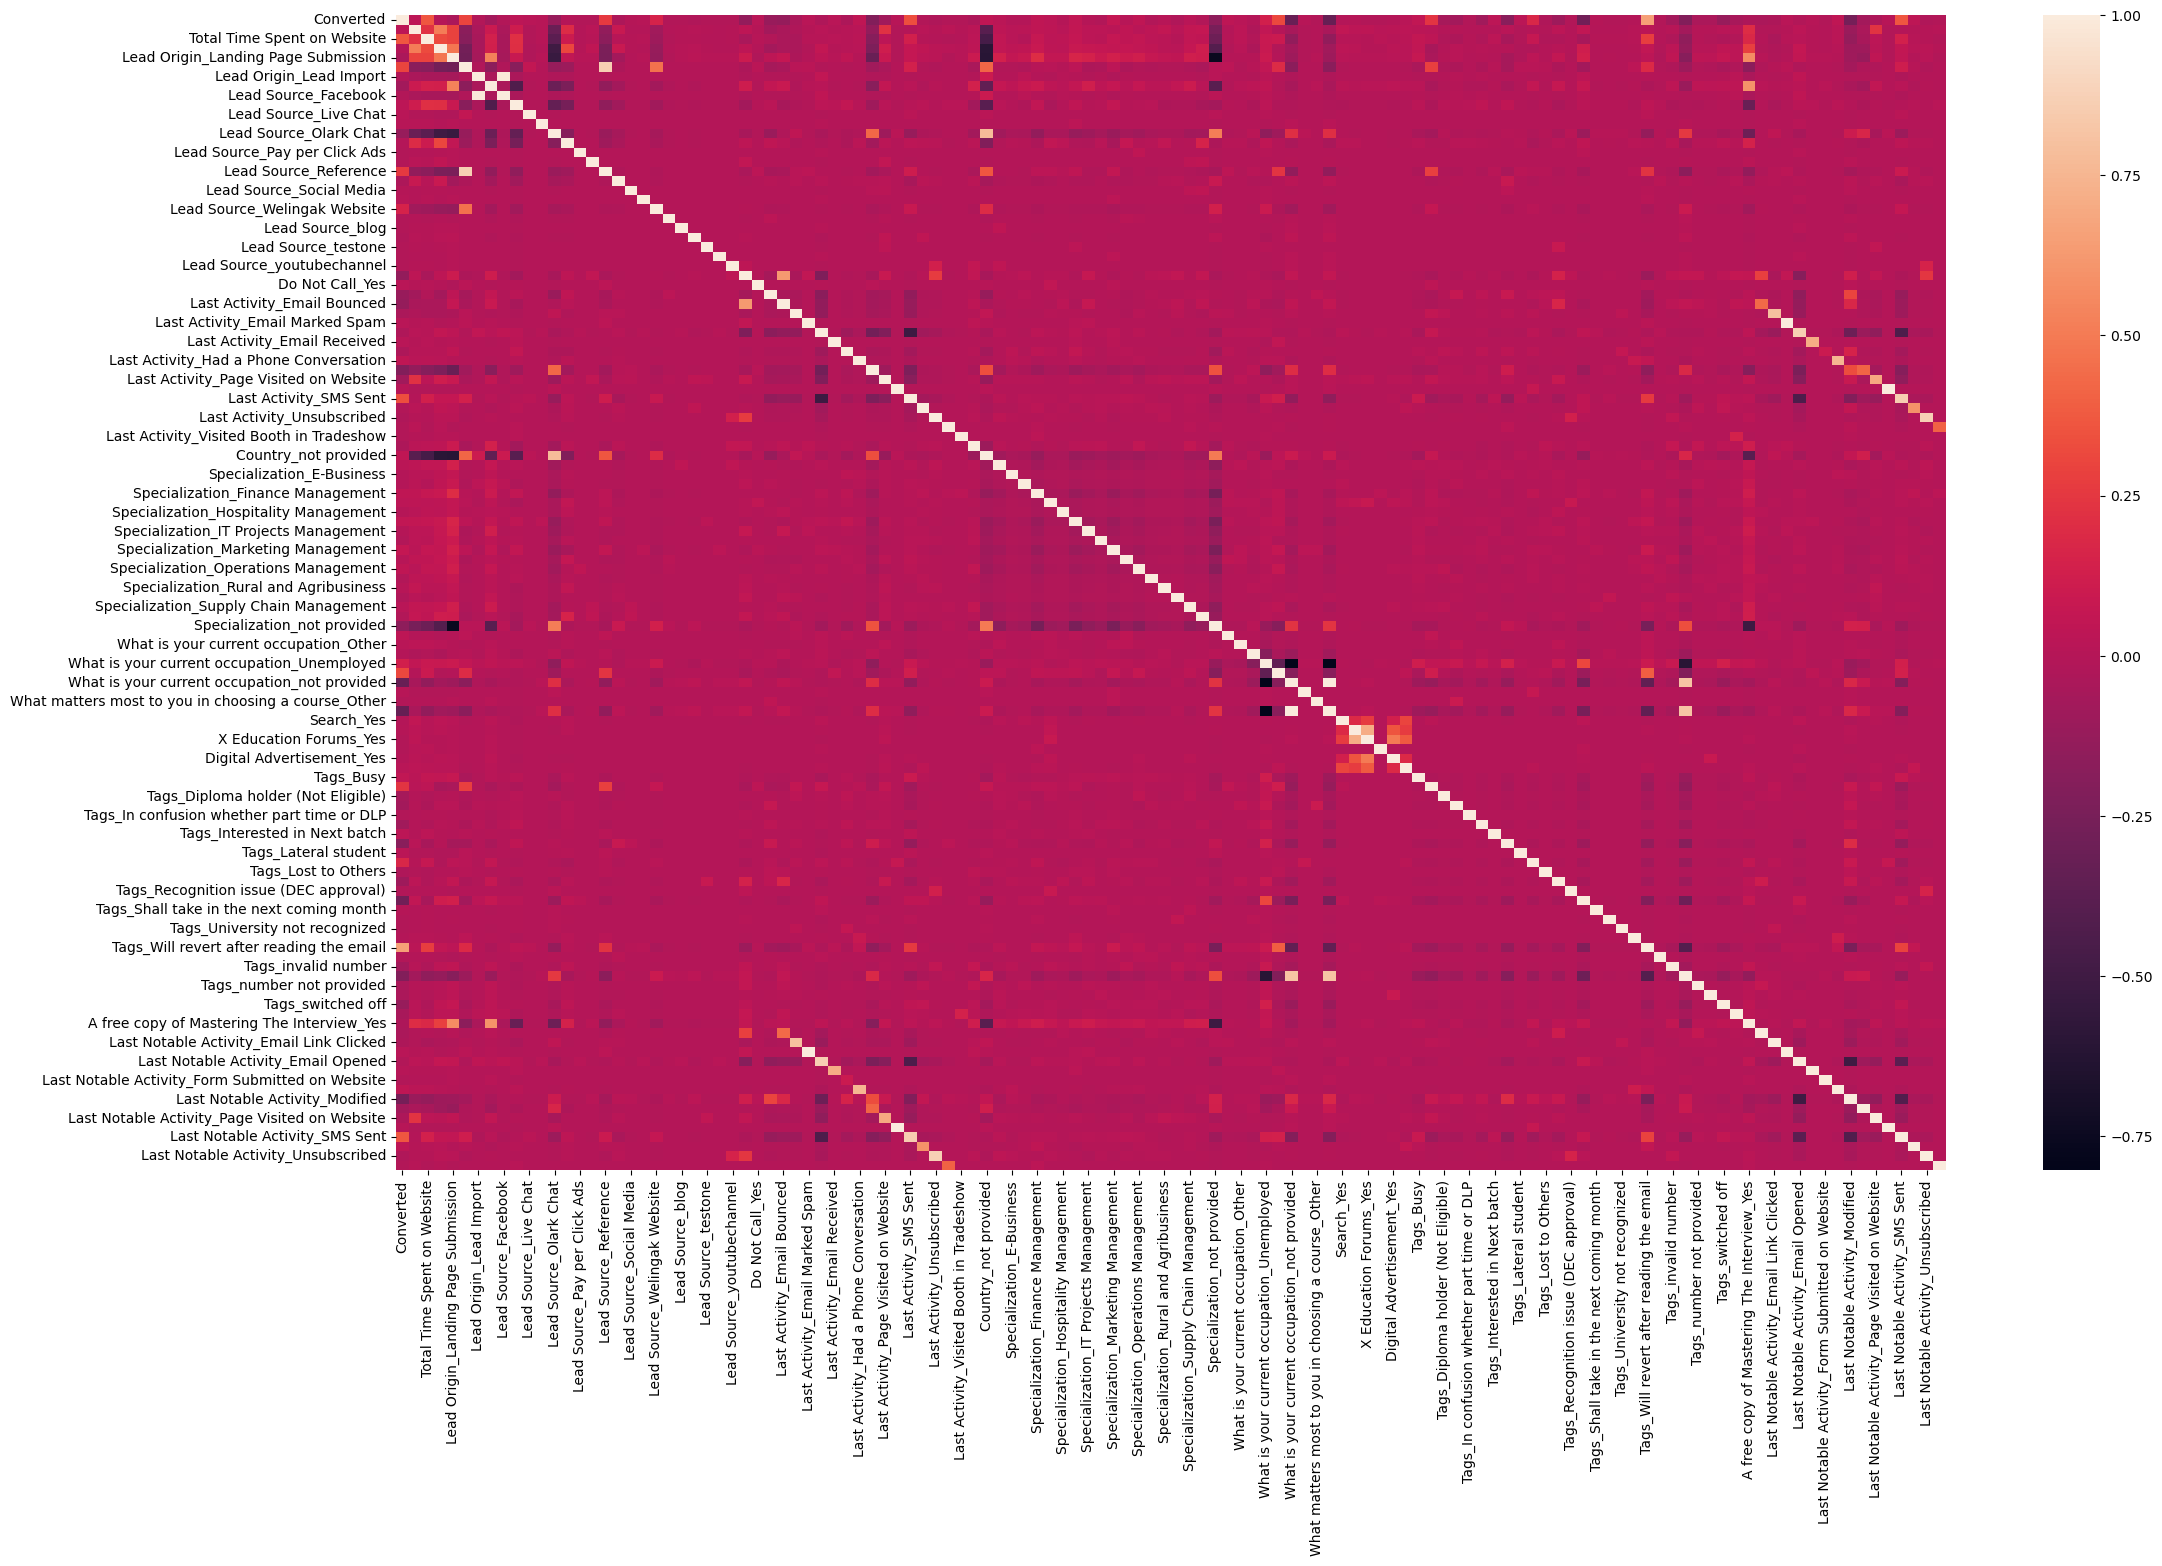

In [51]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

With a large number of columns, it becomes challenging to visualize the correlations using a heatmap.
We'll do it after RFE

## Model Building

In [52]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#### RFE

In [53]:
rfe = RFE(estimator=logreg, n_features_to_select=15)  
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 62),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', False, 10),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Direct Traffic', False, 58),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 60),
 ('Lead Source_Live Chat', False, 101),
 ('Lead Source_NC_EDM', False, 26),
 ('Lead Source_Olark Chat', False, 57),
 ('Lead Source_Organic Search', False, 59),
 ('Lead Source_Pay per Click Ads', False, 103),
 ('Lead Source_Press_Release', False, 94),
 ('Lead Source_Reference', False, 42),
 ('Lead Source_Referral Sites', False, 100),
 ('Lead Source_Social Media', False, 80),
 ('Lead Source_WeLearn', False, 107),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 105),
 ('Lead Source_blog', False, 63),
 ('Lead Source_google', False, 55),
 ('Lead Source_testone', False, 96),
 ('Lead Source_welearnblog_Home', F

In [55]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_not provided',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified'],
      dtype='object')


In [56]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=106)

In [57]:
# Select only the columns selected by RFE

X_train = X_train[col]

### Model 1

In [58]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1055.1
Date:                Sun, 14 Apr 2024   Deviance:                       2110.1
Time:                        14:05:41   Pearson chi2:                 1.14e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6324
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -4.0025      0.211    -19.003      0.000      -4.415      -3.590
Total Time Spent on Website                                    3.7441      0.240     15.584      0.000       3.273       4.215
Lead Source_Welingak Website                                   3.2062      0.744      4.308      0.000       1.748       4.665
Do Not Email_Yes                                              -1.4152      0.277     -5.115      0.000      -1.958      -0.873
Last Activity_SMS Sent                                         2.2269      0.132     16.845      0.000       1.968       2.486
What matters most to you in choosing a course_not provided    -2.8375      0.165    -17.237      0.000      -3.160      -2.515
Tags_Busy                                                      1.9958      0.299      6.683      0.000       1.410       2.581
Tags_Closed by Horizzon                                        9.0376      0.747     12.092      0.000       7.573      10.502
Tags_Lost to EINS                                              9.4092      0.793     11.868      0.000       7.855      10.963
Tags_Ringing                                                  -1.9895      0.314     -6.339      0.000      -2.605      -1.374
Tags_Will revert after reading the email                       6.6354      0.264     25.161      0.000       6.119       7.152
Tags_invalid number                                          -22.0653   1.51e+04     -0.001      0.999   -2.97e+04    2.97e+04
Tags_not provided                                              3.8547      0.232     16.582      0.000       3.399       4.310
Tags_switched off                                             -1.8357      0.561     -3.272      0.001      -2.935      -0.736
Tags_wrong number given                                      -22.5535   1.99e+04     -0.001      0.999    -3.9e+04     3.9e+04
Last Notable Activity_Modified                                -1.5421      0.138    -11.180      0.000      -1.812      -1.272
==============================================================================================================================
"""

### Make a VIF dataframe for all the variables present


In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_not provided,5.42
4,What matters most to you in choosing a course_...,4.93
0,Total Time Spent on Website,1.86
9,Tags_Will revert after reading the email,1.74
3,Last Activity_SMS Sent,1.69
14,Last Notable Activity_Modified,1.46
8,Tags_Ringing,1.18
1,Lead Source_Welingak Website,1.15
2,Do Not Email_Yes,1.12
6,Tags_Closed by Horizzon,1.09


In [60]:
X_train.drop('Tags_not provided', axis = 1, inplace = True)

### Model 2

In [61]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.5
Date:                Sun, 14 Apr 2024   Deviance:                       2500.9
Time:                        14:05:42   Pearson chi2:                 1.19e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6091
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.8834      0.104    -18.082      0.000      -2.088      -1.679
Total Time Spent on Website                                    3.2887      0.211     15.555      0.000       2.874       3.703
Lead Source_Welingak Website                                   4.9763      0.743      6.695      0.000       3.519       6.433
Do Not Email_Yes                                              -1.3211      0.262     -5.034      0.000      -1.835      -0.807
Last Activity_SMS Sent                                         2.3945      0.120     20.003      0.000       2.160       2.629
What matters most to you in choosing a course_not provided    -0.9735      0.121     -8.039      0.000      -1.211      -0.736
Tags_Busy                                                     -0.0410      0.251     -0.163      0.870      -0.533       0.451
Tags_Closed by Horizzon                                        7.2750      0.727     10.008      0.000       5.850       8.700
Tags_Lost to EINS                                              6.4941      0.738      8.804      0.000       5.048       7.940
Tags_Ringing                                                  -4.0627      0.265    -15.309      0.000      -4.583      -3.543
Tags_Will revert after reading the email                       4.7390      0.202     23.404      0.000       4.342       5.136
Tags_invalid number                                          -24.1920   1.49e+04     -0.002      0.999   -2.92e+04    2.92e+04
Tags_switched off                                             -3.9483      0.534     -7.394      0.000      -4.995      -2.902
Tags_wrong number given                                      -24.5821   1.96e+04     -0.001      0.999   -3.83e+04    3.83e+04
Last Notable Activity_Modified                                -1.9116      0.128    -14.902      0.000      -2.163      -1.660
==============================================================================================================================
"""

In [62]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.78
9,Tags_Will revert after reading the email,1.66
3,Last Activity_SMS Sent,1.62
13,Last Notable Activity_Modified,1.45
4,What matters most to you in choosing a course_...,1.42
8,Tags_Ringing,1.16
2,Do Not Email_Yes,1.11
6,Tags_Closed by Horizzon,1.08
5,Tags_Busy,1.07
7,Tags_Lost to EINS,1.05


The VIFs are now all less than 5. So let's drop the ones with the high p-values.

In [63]:
X_train.drop('Tags_invalid number', axis = 1, inplace = True)

### Model 3

In [64]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.8
Date:                Sun, 14 Apr 2024   Deviance:                       2551.7
Time:                        14:05:42   Pearson chi2:                 1.10e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6059
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.9845      0.104    -19.109      0.000      -2.188      -1.781
Total Time Spent on Website                                    3.3455      0.210     15.955      0.000       2.934       3.756
Lead Source_Welingak Website                                   5.0945      0.742      6.867      0.000       3.640       6.549
Do Not Email_Yes                                              -1.3455      0.257     -5.231      0.000      -1.850      -0.841
Last Activity_SMS Sent                                         2.2864      0.116     19.695      0.000       2.059       2.514
What matters most to you in choosing a course_not provided    -0.8518      0.119     -7.162      0.000      -1.085      -0.619
Tags_Busy                                                      0.1056      0.247      0.427      0.669      -0.379       0.590
Tags_Closed by Horizzon                                        7.3209      0.727     10.073      0.000       5.896       8.745
Tags_Lost to EINS                                              6.4888      0.736      8.812      0.000       5.046       7.932
Tags_Ringing                                                  -3.8913      0.263    -14.814      0.000      -4.406      -3.376
Tags_Will revert after reading the email                       4.8145      0.202     23.871      0.000       4.419       5.210
Tags_switched off                                             -3.7673      0.533     -7.075      0.000      -4.811      -2.724
Tags_wrong number given                                      -23.4150   1.19e+04     -0.002      0.998   -2.33e+04    2.33e+04
Last Notable Activity_Modified                                -1.8528      0.127    -14.550      0.000      -2.102      -1.603
==============================================================================================================================
"""

In [65]:
X_train.drop('Tags_wrong number given', axis = 1, inplace = True)

### Model 4

In [66]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1291.8
Date:                Sun, 14 Apr 2024   Deviance:                       2583.6
Time:                        14:05:42   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6040
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.0194      0.104    -19.447      0.000      -2.223      -1.816
Total Time Spent on Website                                    3.3039      0.208     15.893      0.000       2.896       3.711
Lead Source_Welingak Website                                   5.1489      0.742      6.944      0.000       3.696       6.602
Do Not Email_Yes                                              -1.3884      0.255     -5.454      0.000      -1.887      -0.889
Last Activity_SMS Sent                                         2.2281      0.114     19.489      0.000       2.004       2.452
What matters most to you in choosing a course_not provided    -0.7841      0.118     -6.661      0.000      -1.015      -0.553
Tags_Busy                                                      0.1869      0.245      0.763      0.445      -0.293       0.667
Tags_Closed by Horizzon                                        7.3380      0.727     10.099      0.000       5.914       8.762
Tags_Lost to EINS                                              6.4895      0.736      8.821      0.000       5.048       7.931
Tags_Ringing                                                  -3.7908      0.261    -14.530      0.000      -4.302      -3.279
Tags_Will revert after reading the email                       4.8534      0.201     24.126      0.000       4.459       5.248
Tags_switched off                                             -3.6651      0.531     -6.896      0.000      -4.707      -2.623
Last Notable Activity_Modified                                -1.8266      0.127    -14.423      0.000      -2.075      -1.578
==============================================================================================================================
"""

In [67]:
X_train.drop('Tags_Busy', axis = 1, inplace = True)

### Model 5

In [68]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1292.1
Date:                Sun, 14 Apr 2024   Deviance:                       2584.2
Time:                        14:05:42   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6039
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.0056      0.102    -19.644      0.000      -2.206      -1.805
Total Time Spent on Website                                    3.3108      0.208     15.942      0.000       2.904       3.718
Lead Source_Welingak Website                                   5.1331      0.741      6.924      0.000       3.680       6.586
Do Not Email_Yes                                              -1.3960      0.254     -5.494      0.000      -1.894      -0.898
Last Activity_SMS Sent                                         2.2437      0.113     19.921      0.000       2.023       2.464
What matters most to you in choosing a course_not provided    -0.8056      0.114     -7.045      0.000      -1.030      -0.581
Tags_Closed by Horizzon                                        7.3266      0.726     10.086      0.000       5.903       8.750
Tags_Lost to EINS                                              6.4859      0.736      8.814      0.000       5.044       7.928
Tags_Ringing                                                  -3.8201      0.258    -14.794      0.000      -4.326      -3.314
Tags_Will revert after reading the email                       4.8387      0.200     24.163      0.000       4.446       5.231
Tags_switched off                                             -3.6943      0.530     -6.967      0.000      -4.734      -2.655
Last Notable Activity_Modified                                -1.8304      0.126    -14.471      0.000      -2.078      -1.583
==============================================================================================================================
"""

#### Checking final VIF
Making a VIF dataframe for all the variables present

In [69]:

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.74
8,Tags_Will revert after reading the email,1.61
3,Last Activity_SMS Sent,1.56
10,Last Notable Activity_Modified,1.45
4,What matters most to you in choosing a course_...,1.40
7,Tags_Ringing,1.15
2,Do Not Email_Yes,1.10
5,Tags_Closed by Horizzon,1.08
6,Tags_Lost to EINS,1.05
9,Tags_switched off,1.04


In [70]:
coefficients = logm1.fit().params
print("Coefficients:")
print(coefficients.sort_values(ascending=False))

Coefficients:
Tags_Closed by Horizzon                                       7.326623
Tags_Lost to EINS                                             6.485948
Lead Source_Welingak Website                                  5.133055
Tags_Will revert after reading the email                      4.838675
Total Time Spent on Website                                   3.310815
Last Activity_SMS Sent                                        2.243699
What matters most to you in choosing a course_not provided   -0.805576
Do Not Email_Yes                                             -1.395987
Last Notable Activity_Modified                               -1.830419
const                                                        -2.005580
Tags_switched off                                            -3.694286
Tags_Ringing                                                 -3.820130
dtype: float64


## Model Evaluation


Now, with both the p-values and VIFs indicating acceptable values for all variables, we're ready to proceed with making predictions using this finalized set of features

In [71]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.089683
1012    0.016611
9226    0.004931
4750    0.826750
7987    0.999842
1281    0.998521
2880    0.048405
4971    0.941595
7536    0.997426
1248    0.057907
dtype: float64

In [72]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08968264, 0.01661123, 0.00493149, 0.82674951, 0.99984248,
       0.99852101, 0.04840524, 0.94159519, 0.99742646, 0.05790743])

In [73]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.089683
1,0,0.016611
2,0,0.004931
3,1,0.826750
4,1,0.999842


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [74]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.089683,0
1,0,0.016611,0
2,0,0.004931,0
3,1,0.826750,1
4,1,0.999842,1


Now that the probabilities have been calculated and conversion predictions have been derived from them, it's time to conduct a comprehensive evaluation of the model.


#### Creating confusion matrix 


In [75]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3763,  142],
       [ 261, 2185]], dtype=int64)

In [76]:
# Predicted     not_churn    churn
# Actual
# not_churn        3763       142
# churn            261        2185

Check the overall accuracy

In [77]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9365454259171784

Overall Accuracy is coming around ~ 93%

In [78]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [79]:
# Calculating the sensitivity
round(TP/(TP+FN),2)

0.89

In [80]:
# Calculating the specificity
round(TN/(TN+FP),2)

0.96

With the current cutoff set at 0.5, we achieve approximately 93% accuracy, with a sensitivity of around 89% and a specificity of around 96%.

### Optimise Cut off (ROC Curve)
The selection of 0.5 as the cutoff was arbitrary and used to provide a preliminary assessment of the model's performance.
To find the optimal cutoff, we need to plot an ROC curve to determine the area under the curve (AUC) and optimize the threshold.

In [81]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

#### Invoking the ROC function

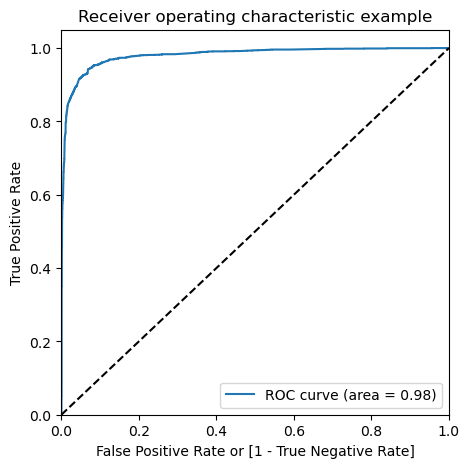

In [83]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.98 which is a very good value.

In [84]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.089683,0,1,0,0,0,0,0,0,0,0,0
1,0,0.016611,0,1,0,0,0,0,0,0,0,0,0
2,0,0.004931,0,1,0,0,0,0,0,0,0,0,0
3,1,0.826750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.999842,1,1,1,1,1,1,1,1,1,1,1


In [85]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.889151  0.973426  0.836364
0.2   0.2  0.925681  0.954211  0.907810
0.3   0.3  0.933554  0.943990  0.927017
0.4   0.4  0.937490  0.920687  0.948015
0.5   0.5  0.936545  0.893295  0.963636
0.6   0.6  0.934656  0.876533  0.971063
0.7   0.7  0.932766  0.860589  0.977977
0.8   0.8  0.926311  0.831971  0.985403
0.9   0.9  0.904110  0.767784  0.989501


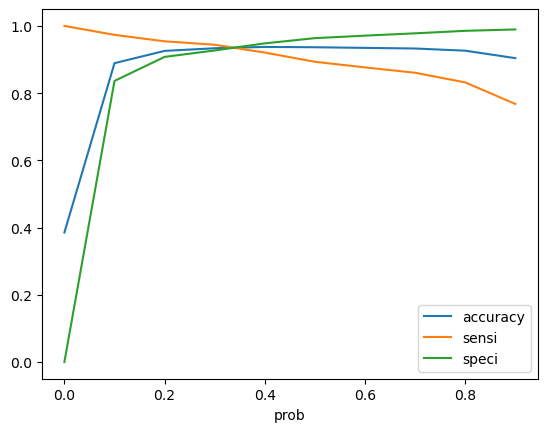

In [86]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.35, you get the optimal values of the three metrics. So let's choose 0.35 as our cutoff now.

In [87]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.089683,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.016611,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.004931,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.826750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.999842,1,1,1,1,1,1,1,1,1,1,1,1


In [88]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9340261376161234

In [89]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3663,  242],
       [ 177, 2269]], dtype=int64)

In [90]:
# Predicted     not_churn    churn
# Actual
# not_churn        3663       242
# churn            177        2269

In [91]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.9276369582992641

In [93]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.9380281690140845

##### Precision and Recall


##### Precision

TP / TP + FP

In [94]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.938977223893425

#### Recall

TP / TP + FN

In [95]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.89329517579722

This cutoff point seems good to go!

With the current cutoff set at 0.35, we achieve approximately 93% accuracy, with a sensitivity of around 92% and a specificity of around 93%.

 ### Prediction on Test set

#### Scaling 

Scaling numeric values


In [96]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [97]:
# Substituting all the columns in the final train model
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,What matters most to you in choosing a course_not provided,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_not provided,Tags_switched off,Tags_wrong number given,Last Notable Activity_Modified
3271,0.070530,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1490,0.679695,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7936,0.033243,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4216,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3830,0.073675,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [98]:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Total Time Spent on Website,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,What matters most to you in choosing a course_not provided,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_not provided,Tags_switched off,Tags_wrong number given,Last Notable Activity_Modified
3271,1.0,0.070530,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1490,1.0,0.679695,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7936,1.0,0.033243,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4216,1.0,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3830,1.0,0.073675,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.372417,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2879,1.0,0.264600,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6501,1.0,0.599730,0,0,1,0,0,0,0,0,1,0,0,0,0,0
7155,1.0,0.231357,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [99]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [100]:
y_test_pred[:10]
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [101]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [102]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.061735
1,1,0.994391
2,0,0.054126
3,1,0.970490
4,0,0.062420


In [103]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [104]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.061735,0
1,1,0.994391,1
2,0,0.054126,0
3,1,0.970490,1
4,0,0.062420,0
...,...,...,...
2718,0,0.041768,0
2719,0,0.010417,0
2720,1,0.999180,1
2721,0,0.025060,0


In [105]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9313257436650753

In [106]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1623,  111],
       [  76,  913]], dtype=int64)

In [107]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [108]:
# Calculating the sensitivity
TP/(TP+FN)

0.923154701718908

In [109]:
# Calculating the specificity
TN/(TN+FP)

0.9359861591695502

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 93%.

#### Precision-Recall

In [110]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3763,  142],
       [ 261, 2185]], dtype=int64)

In [111]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.938977223893425

In [112]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.89329517579722

#### Precision and Recall Tradeoff


In [113]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

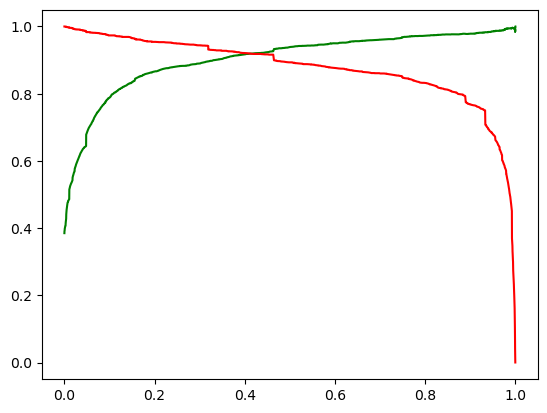

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.089683,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.016611,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.004931,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.826750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.999842,1,1,1,1,1,1,1,1,1,1,1,1


In [116]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9376476145488899

In [117]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3706,  199],
       [ 197, 2249]], dtype=int64)

In [118]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [119]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.9187091503267973

In [120]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.919460343417825

#### Making Predictions on the Test Set

In [121]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.061735
1,1,0.994391
2,0,0.054126
3,1,0.970490
4,0,0.062420


In [122]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.061735,0
1,1,0.994391,1
2,0,0.054126,0
3,1,0.970490,1
4,0,0.062420,0
...,...,...,...
2718,0,0.041768,0
2719,0,0.010417,0
2720,1,0.999180,1
2721,0,0.025060,0


In [123]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9316929856775615

In [124]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1632,  102],
       [  84,  905]], dtype=int64)

In [125]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [126]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8987090367428004

In [127]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.9150657229524772

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model